In [1]:
import pandas as pd
df2 = pd.read_csv('df2.csv')

In [3]:
#x全放==============================================================================================================
df3=df2
df3=df3.drop(columns=['結帳日期','Unnamed: 0'])
df3=df3.dropna()

onehot_encoding=pd.get_dummies(df3["month"])
df3 = pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
onehot_encoding=pd.get_dummies(df3["year"])
df3 = pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
onehot_encoding=pd.get_dummies(df3["origin_rank"])
df3 = pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
onehot_encoding=pd.get_dummies(df3["new_rank"])
df3= pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
onehot_encoding=pd.get_dummies(df3["帳戶名稱"])
df3= pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
#df3=df3.drop(columns=['month',"origin_rank","new_rank","帳戶名稱",'turnover_right']) 

C:\Users\Erinys\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  import sys
C:\Users\Erinys\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  if __name__ == '__main__':
C:\Users\Erinys\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Erinys\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  del sys.path[0]
C:\Users\Erinys\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarn

In [4]:
fliter = ((df3["year"].astype(float))<2020)
df5=df3[fliter]    #train
fliter = ((df3["year"].astype(float))==2020)
df6=df3[fliter]    #test

In [5]:
df5t=df5.drop(columns=['month','year',"origin_rank","new_rank","帳戶名稱",'turnover_right'])#train
df6t=df6.drop(columns=['month','year',"origin_rank","new_rank","帳戶名稱","turnover_right"])#test

In [7]:
X_train=df5t.drop(["freq"], axis=1)
X_test=df6t.drop(["freq"], axis=1)
y_train=df5t[['freq']]
y_test=df6t[['freq']]

In [11]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
score = model.score(X_train, y_train)  
print("Training score: ", score)

mse = mean_squared_error(y_test, y_pred)
rmse=pow(mse,0.5)
print("RMSE: %.2f" % rmse)

1- mean_squared_error(y_test,y_pred)/ np.var(y_test)

Training score:  0.6796037853838984
RMSE: 37.95


freq   -0.412364
dtype: float64

In [9]:
#改取前10===================================================================================
#轉LOG再轉回來
frq_log=np.log(df2['freq'])
df2['log_fq']=frq_log
df2

,Unnamed: 0,帳戶名稱,結帳日期,數量,總價,消費量,acc_money_right,avg_money_right,turnover_right,diff_right,origin_rank,new_rank,freq,MAONE,MATHREE,MAFIVE,month,year,log_fq
0,0,BOYLES BROS DIAMANTINA SA,2020-06-22,4.0,8024.0,72,8024.0,8024.0,0.0,1.0,D,新顧客,NaN,NaN,NaN,NaN,6,2020,NaN
1,1,NR MAQUINAS Y HERRAMIENTAS CNC LTDA.,2020-05-28,4.0,8555.0,72,20945.0,20945.0,0.0,1.0,D,新顧客,88.0,NaN,NaN,NaN,5,2020,4.477337
2,2,NR MAQUINAS Y HERRAMIENTAS CNC LTDA.,2020-08-24,6.0,12390.0,108,20945.0,20945.0,0.0,1.0,D,新顧客,NaN,88.0,NaN,NaN,8,2020,NaN
3,3,一信衛生工程有限公司,2017-03-02,2.0,3800.0,36,65200.0,16300.0,67.0,4.0,D,新顧客,12.0,NaN,NaN,NaN,3,2017,2.484907
4,4,一信衛生工程有限公司,2017-03-14,2.0,3800.0,36,65200.0,16300.0,67.0,4.0,D,新顧客,27.0,12.0,NaN,NaN,3,2017,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31049,31049,龍馬精密科技股份有限公司,2019-05-16,1.0,2400.0,18,42150.0,10537.5,365.0,4.0,D,新顧客,176.0,71.0,147.666667,NaN,5,2019,5.170484
31050,31050,龍馬精密科技股份有限公司,2019-11-08,1.0,7200.0,200,42150.0,10537.5,365.0,4.0,D,新顧客,90.0,176.0,204.333333,185.0,11,2019,4.499810
31051,31051,龍馬精密科技股份有限公司,2020-02-06,1.0,3000.0,18,42150.0,10537.5,365.0,4.0,D,新顧客,161.0,90.0,112.333333,141.8,2,2020,5.081404
31052,31052,龍馬精密科技股份有限公司,2020-07-16,1.0,7200.0,200,42150.0,10537.5,365.0,4.0,D,新顧客,25.0,161.0,142.333333,172.8,7,2020,3.218876


In [10]:
df2.columns

Index(['Unnamed: 0', '帳戶名稱', '結帳日期', '數量', '總價', '消費量', 'acc_money_right',
       'avg_money_right', 'turnover_right', 'diff_right', 'origin_rank',
       'new_rank', 'freq', 'MAONE', 'MATHREE', 'MAFIVE', 'month', 'year',
       'log_fq'],
      dtype='object')

In [11]:
df3=df2
df3=df3.drop(columns=['結帳日期','Unnamed: 0'])
df3=df3.dropna()

#onehot_encoding=pd.get_dummies(df3["month"])
#df3 = pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
onehot_encoding=pd.get_dummies(df3["year"])
df3 = pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
#onehot_encoding=pd.get_dummies(df3["origin_rank"])
#df3 = pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
onehot_encoding=pd.get_dummies(df3["new_rank"])
df3= pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])
#onehot_encoding=pd.get_dummies(df3["帳戶名稱"])
#df3= pd.concat([onehot_encoding,df3],axis=1, join_axes=[onehot_encoding.index])

C:\Users\Erinys\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  
C:\Users\Erinys\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  if sys.path[0] == '':


In [12]:
fliter = ((df3["year"].astype(float))<2020)
df5=df3[fliter]    #train
fliter = ((df3["year"].astype(float))==2020)
df6=df3[fliter]    #test

In [13]:
df5t=df5.drop(columns=['month','year',"origin_rank","new_rank","帳戶名稱",'turnover_right','freq','數量','diff_right','freq'])#train
df6t=df6.drop(columns=['month','year',"origin_rank","new_rank","帳戶名稱","turnover_right",'freq','數量','diff_right','freq'])#test

In [14]:
df5t.columns

Index([            '常貴客',             '新顧客',             '沉睡客',
                   '流失客',              2017,              2018,
                    2019,              2020,              '總價',
                   '消費量', 'acc_money_right', 'avg_money_right',
                 'MAONE',         'MATHREE',          'MAFIVE',
                'log_fq'],
      dtype='object')

In [15]:
X_train=df5t.drop(['log_fq'], axis=1)
X_test=df6t.drop(['log_fq'], axis=1)
y_train=df5t[['log_fq']]
y_test=df6t[['log_fq']]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [50]:
training_set_x = df5t.drop(['log_fq'], axis=1)
testing_set_x = df6t.drop(['log_fq'], axis=1)
training_set_y = df5t[['log_fq']]
testing_set_y = df6t[['log_fq']]

In [51]:
training_set_y

,log_fq
8,4.820282
9,4.174387
10,0.693147
11,5.834811
12,3.178054
...,...
31034,2.397895
31035,4.204693
31036,3.433987
31037,4.753590


In [52]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled_y = sc.fit_transform(training_set_y)
training_set_scaled_x = sc.fit_transform(training_set_x)

In [55]:
training_set_scaled_y[8,0]

0.8057867694420654

In [56]:
X_train = []   
y_train = []   #預測點
for i in range(len(training_set_scaled_x)):  
    X_train.append(training_set_scaled_x[i, :])
    y_train.append(training_set_scaled_y[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

In [57]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [62]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [63]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 40, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 40, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 40))
regressor.add(Dropout(0.2))

In [64]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [65]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
17468/17468 [==============================] - 27s 2ms/step - loss: 0.0375
Epoch 2/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0281
Epoch 3/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0269
Epoch 4/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0262
Epoch 5/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0261
Epoch 6/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0259
Epoch 7/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0256
Epoch 8/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0252
Epoch 9/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0248
Epoch 10/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0243
Epoch 11/50
17468/17468 [==============================] - 23s 1ms/step - loss: 0.0242
Epoch 12/50
17468/17468 [===========================

In [66]:
sc = MinMaxScaler(feature_range = (0, 1))
testing_set_scaled_x = sc.fit_transform(testing_set_x)
testing_set_scaled_y = sc.fit_transform(testing_set_y)
X_test = []   
y_test = []   #預測點
for i in range(len(testing_set_scaled_x)):  
    X_test.append(testing_set_scaled_x[i, :])
    y_test.append(testing_set_scaled_y[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)  # 轉成numpy array的格式，以利輸入 RNN

In [67]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [68]:
predicted = regressor.predict(X_test)

In [76]:
predicted

array([[0.5877528 ],
       [0.58842385],
       [0.46276814],
       ...,
       [0.4616611 ],
       [0.6071909 ],
       [0.62064064]], dtype=float32)

In [78]:
y_pred = []
ma = max(training_set_y['log_fq'].values)
mi = min(training_set_y['log_fq'].values)
for i in predicted:
    y_pred.append(i[0]*(ma - mi )+mi)
    #pre_result.append(i*(max(y_train) - min(y_train))+min(y_train))

In [75]:
training_set_y['log_fq'].values

array([4.82028157, 4.17438727, 0.69314718, ..., 3.4339872 , 4.75359019,
       4.49980967])

In [79]:
uu=testing_set_y.reset_index()
uu["ypred"]=y_pred
uus=uu.sort_values(by=['index'])
uusr=uus.reset_index()
uusr

,level_0,index,log_fq,ypred
0,0,33,5.192957,4.047578
1,1,52,4.804021,4.052199
2,2,77,3.555348,3.186867
3,3,78,4.912655,3.060029
4,4,103,4.983607,3.875661
...,...,...,...,...
3584,3584,31041,3.044522,3.105990
3585,3585,31042,4.094345,3.308716
3586,3586,31043,2.397895,3.179244
3587,3587,31051,5.081404,4.181439


In [80]:
fq=np.exp(uusr['log_fq'])
uusr['freq']=fq
pred_exp=np.exp(uusr['ypred'])
uusr['ypred_exp']=pred_exp
uusr

,level_0,index,log_fq,ypred,freq,ypred_exp
0,0,33,5.192957,4.047578,180.0,57.258631
1,1,52,4.804021,4.052199,122.0,57.523839
2,2,77,3.555348,3.186867,35.0,24.212461
3,3,78,4.912655,3.060029,136.0,21.328170
4,4,103,4.983607,3.875661,146.0,48.214564
...,...,...,...,...,...,...
3584,3584,31041,3.044522,3.105990,21.0,22.331311
3585,3585,31042,4.094345,3.308716,60.0,27.349987
3586,3586,31043,2.397895,3.179244,11.0,24.028576
3587,3587,31051,5.081404,4.181439,161.0,65.460008


In [81]:
mse = mean_squared_error(uusr['ypred_exp'], uusr['freq'])
rmse=pow(mse,0.5)
rmse  ##總rmse

27.551117799406587

In [82]:
df6

,常貴客,新顧客,沉睡客,流失客,2017,2018,2019,2020,帳戶名稱,數量,...,diff_right,origin_rank,new_rank,freq,MAONE,MATHREE,MAFIVE,month,year,log_fq
33,0,1,0,0,0,0,0,1,一通實業有限公司,2.0,...,4.0,D,新顧客,180.0,155.0,126.000000,93.6,2,2020,5.192957
52,0,1,0,0,0,0,0,1,丁卯工業社-HL,3.0,...,4.0,C,新顧客,122.0,149.0,109.666667,110.6,4,2020,4.804021
77,0,1,0,0,0,0,0,1,三偉實業有限公司-HL,2.0,...,4.0,D,新顧客,35.0,60.0,49.000000,40.4,2,2020,3.555348
78,0,1,0,0,0,0,0,1,三偉實業有限公司-HL,3.0,...,4.0,D,新顧客,136.0,35.0,33.000000,38.0,3,2020,4.912655
103,0,1,0,0,0,0,0,1,三友電鍍股份有限公司-HL,1.0,...,4.0,D,新顧客,146.0,37.0,98.333333,97.6,1,2020,4.983607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31041,0,1,0,0,0,0,0,1,龍豪精機社-HL,1.0,...,4.0,D,新顧客,21.0,57.0,30.333333,47.6,5,2020,3.044522
31042,0,1,0,0,0,0,0,1,龍豪精機社-HL,1.0,...,4.0,D,新顧客,60.0,21.0,35.000000,45.6,6,2020,4.094345
31043,0,1,0,0,0,0,0,1,龍豪精機社-HL,1.0,...,4.0,D,新顧客,11.0,60.0,46.000000,34.4,8,2020,2.397895
31051,0,1,0,0,0,0,0,1,龍馬精密科技股份有限公司,1.0,...,4.0,D,新顧客,161.0,90.0,112.333333,141.8,2,2020,5.081404


In [83]:
df4u=df6.reset_index()
#回到df4U去建字典
D2= {}
D3= {}
D4= {}
for i in range(len(df4u['index'])):
   # if D2.has_key(df.loc[i,'帳戶名稱']):
   # if (df.loc[i,'帳戶名稱'] in D2)==False:
        D2[df4u.loc[i,'index']]=df4u.loc[i,'MAONE']
        D3[df4u.loc[i,'index']]=df4u.loc[i,'new_rank']
        D4[df4u.loc[i,'index']]=df4u.loc[i,'origin_rank']
        
ld2=[]
ld3=[]
ld4=[]
#df2.loc[i,'MAONE']
#uusr.loc[i,'index']
#dict.get(key, default=None)
for i in range(len(uusr['level_0'])):
    ld2s=D2.get(uusr.loc[i,'index'])
    ld3s=D3.get(uusr.loc[i,'index'])
    ld4s=D4.get(uusr.loc[i,'index'])
    ld2.append(ld2s)
    ld3.append(ld3s)
    ld4.append(ld4s)

uusr['OLD_METHOD']=ld2
uusr['new_rank']=ld3
uusr['origin_rank']=ld4
uusr

,level_0,index,log_fq,ypred,freq,ypred_exp,OLD_METHOD,new_rank,origin_rank
0,0,33,5.192957,4.047578,180.0,57.258631,155.0,新顧客,D
1,1,52,4.804021,4.052199,122.0,57.523839,149.0,新顧客,C
2,2,77,3.555348,3.186867,35.0,24.212461,60.0,新顧客,D
3,3,78,4.912655,3.060029,136.0,21.328170,35.0,新顧客,D
4,4,103,4.983607,3.875661,146.0,48.214564,37.0,新顧客,D
...,...,...,...,...,...,...,...,...,...
3584,3584,31041,3.044522,3.105990,21.0,22.331311,57.0,新顧客,D
3585,3585,31042,4.094345,3.308716,60.0,27.349987,21.0,新顧客,D
3586,3586,31043,2.397895,3.179244,11.0,24.028576,60.0,新顧客,D
3587,3587,31051,5.081404,4.181439,161.0,65.460008,90.0,新顧客,D


In [84]:
#A級結果
fliter = (uusr["origin_rank"] == "A")
uusra=uusr[fliter]
uusra=uusra.drop(columns=['level_0','index'])
uusra=uusra.reset_index()

rmse=0
for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'OLD_METHOD']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)
print('old:'+str(rmse))
rmse=0

for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'ypred_exp']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)

print('mine:'+str(rmse))
print("測試資料筆數"+str(len(uusra["freq"])))

old:8.136888546851345
mine:7.168025052994364
測試資料筆數469


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


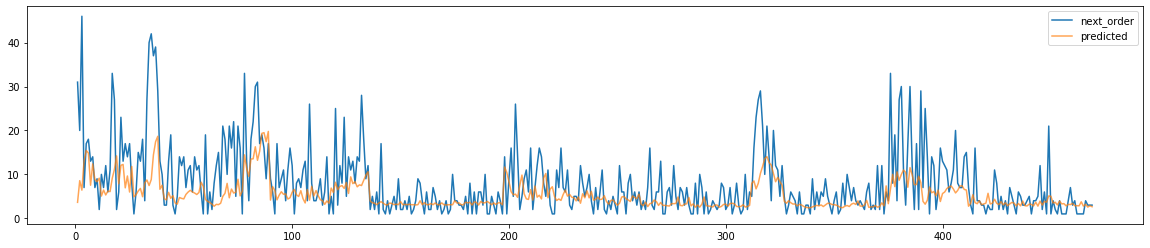

In [85]:
px=[]
for i in range(len(uusra["freq"])):
    px.append(i+1)
plt.figure(figsize=(20,4))
plt.plot(px, uusra["freq"], label="next_order")
plt.plot(px, uusra["ypred_exp"], label="predicted",alpha=0.7)
#plt.title("Boston test and predicted data")
plt.legend()
plt.show()    

In [87]:
#B級結果
fliter = (uusr["origin_rank"] == "B")
uusra=uusr[fliter]
uusra=uusra.drop(columns=['level_0','index'])
uusra=uusra.reset_index()

rmse=0
for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'OLD_METHOD']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)
print('old:'+str(rmse))
rmse=0

for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'ypred_exp']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)

print('mine:'+str(rmse))
print("測試資料筆數"+str(len(uusra["freq"])))

old:14.629535227438833
mine:11.24207849636659
測試資料筆數515


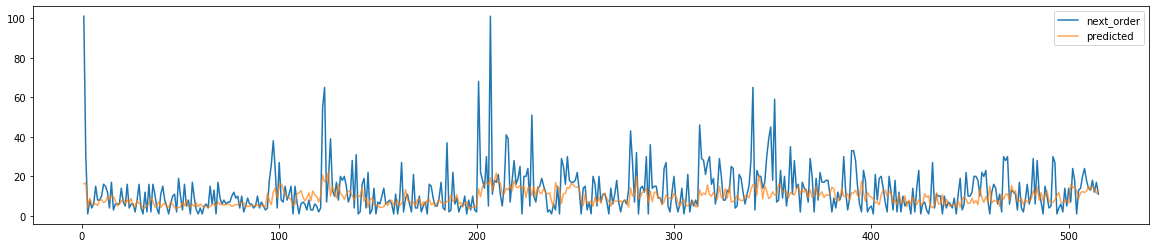

In [88]:
px=[]
for i in range(len(uusra["freq"])):
    px.append(i+1)
plt.figure(figsize=(20,4))
plt.plot(px, uusra["freq"], label="next_order")
plt.plot(px, uusra["ypred_exp"], label="predicted",alpha=0.7)
#plt.title("Boston test and predicted data")
plt.legend()
plt.show()    

In [93]:
#B級結果
fliter = (uusr["origin_rank"] == "C")
uusra=uusr[fliter]
uusra=uusra.drop(columns=['level_0','index'])
uusra=uusra.reset_index()

rmse=0
for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'OLD_METHOD']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)
print('old:'+str(rmse))
rmse=0

for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'ypred_exp']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)

print('mine:'+str(rmse))
print("測試資料筆數"+str(len(uusra["freq"])))

old:32.350351934256764
mine:22.53246353406699
測試資料筆數1480


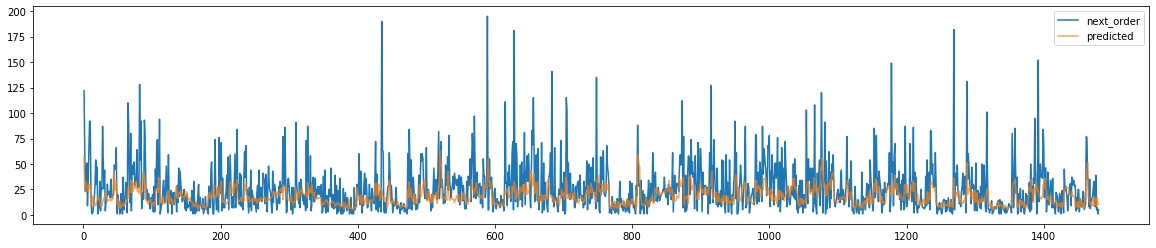

In [90]:
px=[]
for i in range(len(uusra["freq"])):
    px.append(i+1)
plt.figure(figsize=(20,4))
plt.plot(px, uusra["freq"], label="next_order")
plt.plot(px, uusra["ypred_exp"], label="predicted",alpha=0.7)
#plt.title("Boston test and predicted data")
plt.legend()
plt.show()    

In [91]:
#D級結果
fliter = (uusr["origin_rank"] == "D")
uusra=uusr[fliter]
uusra=uusra.drop(columns=['level_0','index'])
uusra=uusra.reset_index()

rmse=0
for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'OLD_METHOD']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)
print('old:'+str(rmse))
rmse=0

for i in range(len(uusra["freq"])):
    rmse+=pow((uusra.loc[i,'ypred_exp']-uusra.loc[i,'freq']),2)
rmse=rmse/len(uusra["freq"])
rmse=pow(rmse,0.5)

print('mine:'+str(rmse))
print("測試資料筆數"+str(len(uusra["freq"])))

old:86.93150304821735
mine:40.91923722726038
測試資料筆數1125


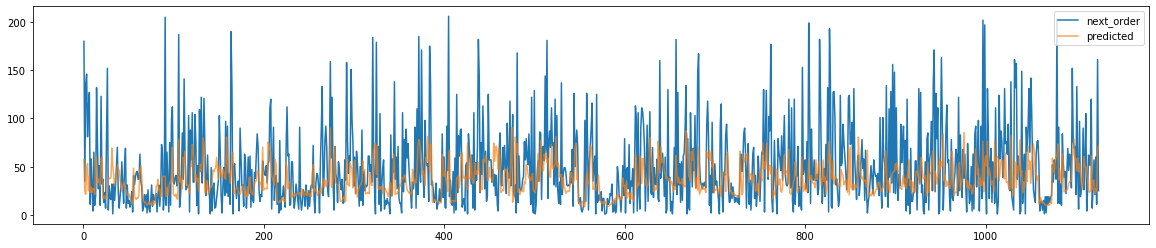

In [92]:
px=[]
for i in range(len(uusra["freq"])):
    px.append(i+1)
plt.figure(figsize=(20,4))
plt.plot(px, uusra["freq"], label="next_order")
plt.plot(px, uusra["ypred_exp"], label="predicted",alpha=0.7)
#plt.title("Boston test and predicted data")
plt.legend()
plt.show()    